# Problem 88

In [5]:
import numpy as np
import matplotlib.pyplot as plt

## Parts A and B

In [6]:
n=5


s = np.random.randint(2,size=(n))

def find_energies(n):
    J = np.random.randn(n,n)
    J[np.diag_indices_from(J)] = 0
    #print(J)
    E = np.zeros(2**len(J))
    s=np.zeros(len(J))
    #iterate over all s
    for x in range(2**len(J)):
        for i in range(len(s)):
            s[i] = (x % (2**(i+1)) >= 2**i )
        s=2*s-1
        #print(s)
        E[x] = np.matmul(np.matmul(s,J),s)
    return np.sort(E)    

#print(np.matmul(np.matmul(s,J),s))

## Find average ground state, keeping the distribution fixed

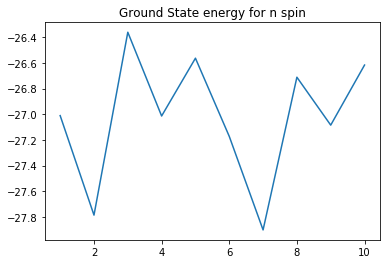

In [7]:
En = []
for x in range(10):
    En.append(np.array([find_energies(10)[0] for x in range(100)]).mean())

plt.plot(range(1,11),En)
plt.title("Ground State energy for n spin")

## Find average ground state, scaling variance as 1/N

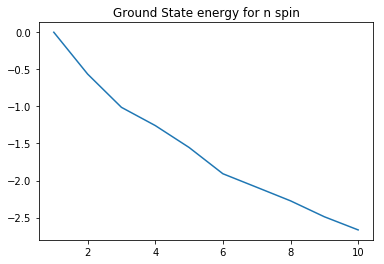

In [80]:
def find_energies_var(n):
    J = np.random.normal(size=(n,n),scale=1/n)
    J[np.diag_indices_from(J)] = 0
    #print(J)
    E = np.zeros(2**len(J))
    s=np.zeros(len(J))
    #iterate over all s
    for x in range(2**len(J)):
        for i in range(len(s)):
            s[i] = (x % (2**(i+1)) >= 2**i )
        s=2*s-1
        #print(s)
        E[x] = np.matmul(np.matmul(s,J),s)
    return np.sort(E)

En_var = []
for x in range(1,11):
    En_var.append(np.array([find_energies_var(x)[0] for y in range(100)]).mean())

plt.plot(range(1,11),En_var)
plt.title("Ground State energy for n spin")

## Ground state energy clearly decreases linearly with N when variance scales with 1/N, while fixed variance means the ground state doesn't change with N.

## Part C: Look at variance of Energy per spin in ground state, the variance is lower for higher N so it appears that averaging happens as N goes to infinity

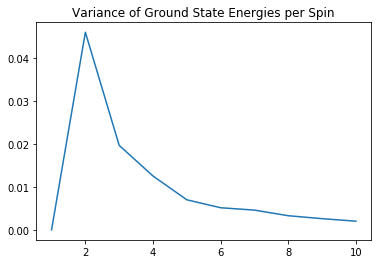

In [81]:
v = []
for x in range(1,11):
    v.append(np.array([find_energies_var(x)[0]/x for y in range(100)]).var())
    
plt.plot(range(1,11),v)
plt.title("Variance of Ground State Energies per Spin")


## Part D: Find energy gap distribution for e.g. n=8

(array([535., 511., 488., 416., 453., 431., 388., 351., 357., 378., 361.,
        326., 305., 271., 263., 240., 253., 236., 229., 187., 222., 177.,
        161., 173., 137., 148., 147., 128., 124., 119.,  92.,  93.,  94.,
         80.,  97.,  84.,  82.,  78.,  64.,  70.,  44.,  49.,  44.,  39.,
         32.,  37.,  30.,  27.,  34.,  18.,  28.,  31.,  28.,  14.,  13.,
         11.,  24.,  14.,  15.,   9.,   6.,   9.,   8.,   5.,   6.,   8.,
          5.,   6.,   6.,   6.,   3.,   1.,   6.,   3.,   5.,   5.,   4.,
          1.,   1.,   4.,   1.,   0.,   2.,   1.,   0.,   1.,   2.,   1.,
          1.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,
          2.]),
 array([1.80315118e-05, 1.49040601e-02, 2.97900888e-02, 4.46761174e-02,
        5.95621461e-02, 7.44481747e-02, 8.93342033e-02, 1.04220232e-01,
        1.19106261e-01, 1.33992289e-01, 1.48878318e-01, 1.63764347e-01,
        1.78650375e-01, 1.93536404e-01, 2.08422432e-01, 2.23308461e-01,
        2.38194490e-01, 2.5308

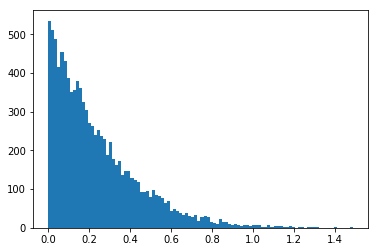

In [37]:
def find_energies_var_gap(n):
    J = np.random.normal(size=(n,n),scale=1/n)
    J[np.diag_indices_from(J)] = 0
    #print(J)
    E = np.zeros(2**len(J))
    s=np.zeros(len(J))
    #iterate over all s
    for x in range(2**len(J)):
        for i in range(len(s)):
            s[i] = (x % (2**(i+1)) >= 2**i )
        s=2*s-1
        #print(s)
        E[x] = np.matmul(np.matmul(s,J),s)
    return np.sort(E)[2] - np.sort(E)[0]

gaps = [find_energies_var_gap(8) for x in range(10000)]


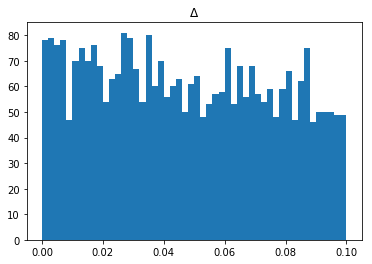

In [84]:
plt.hist(gaps,bins=50,range=(0,.1))
plt.title("$\Delta$")

##  The probability of $\Delta$ appears to flatten at low $\Delta$.  

## Part e:

In [ ]:
def find_energies_var(n):
    J = np.random.normal(size=(n,n),scale=1/n)
    J[np.diag_indices_from(J)] = 0
    #print(J)
    E = []
    s=np.zeros(len(J))
    #iterate over all s
    for x in range(2**len(J)):
        for i in range(len(s)):
            s[i] = (x % (2**(i+1)) >= 2**i )
        s=2*s-1
        print(s)
        E.append([np.matmul(np.matmul(s,J),s), s])
    return E

en = find_energies_var(8)

In [77]:
en=np.array(en)
print(min(en[:,0]))

-1.9802704962163216


## The ground state has energy -1.9, and has configuration -1, -1, 1., -1, 1., 1., 1., 1

## But there's also a state with energy -1.3731254394951204, and spins 1., 1., -1, -1, -1, -1, -1, -1, which is very different from the ground state.  For a ferromagnet, all states with energy close to the ground state would have spin configurations similar to the ground state